In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [115]:
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv", sep=';')

In [116]:
data.head()

,global_id,ID,Year,UnemployedMen,UnemployedWomen,UnemployedYoung,UnemployedDisabled,UnemployedTotal,Period,Unnamed: 9
0,39809862,1,2001,8896,25762,6696,824,34658,Декабрь,NaN
1,64592413,3,2003,8679,24967,6226,1155,33646,Декабрь,NaN
2,64592414,4,2004,9822,25239,7318,1411,35061,Декабрь,NaN
3,64592415,5,2005,10844,23597,6890,1531,34441,Декабрь,NaN
4,64592416,6,2006,11041,22928,6604,1671,33969,Декабрь,NaN


# Задание
Сгруппируйте данные по годам, если в году меньше 6 значений, отбросьте эти годы.

Постройте модель линейной регрессии по годам среднего значения отношения UnemployedDisabled к UnemployedTotal (процента людей с ограниченными возможностями) за месяц и ответьте, какое ожидается значение процента безработных инвалидов в 2020 году при сохранении текущей политики города Москвы?

Ответ округлите до сотых. Например, 2,32
Вопросы к этому заданию

Какое ожидается значение в 2020 году при сохранении текущей политики города Москвы?

### Если в году меньше 6 значений, отбросьте эти годы

In [117]:
data_1 = data.groupby("Year").filter(lambda x: len(x) >= 6)
data_1

,global_id,ID,Year,UnemployedMen,UnemployedWomen,UnemployedYoung,UnemployedDisabled,UnemployedTotal,Period,Unnamed: 9
10,64592422,13,2012,17906,23266,6237,1697,41172,Февраль,NaN
12,273573575,12,2012,18012,23806,6413,1734,41818,Январь,NaN
13,273573576,14,2012,17357,22485,5929,1659,39842,Март,NaN
14,273573577,15,2012,16886,21839,5777,1558,38725,Апрель,NaN
15,273573578,16,2012,15650,20411,5179,1449,36061,Май,NaN
...,...,...,...,...,...,...,...,...,...,...
96,918869066,101,2019,13123,16904,3103,575,30027,Февраль,NaN
97,918869067,102,2019,13433,17164,3102,593,30597,Март,NaN
98,926094627,103,2019,13803,17319,3060,593,31122,Апрель,NaN
99,933200250,104,2019,12818,16221,2711,577,29039,Май,NaN


In [118]:
data_1_group = data_1.dropna(axis=1, how='all').groupby("Year")

In [119]:
data_1_group.apply(print)

    global_id  ID  Year  UnemployedMen  UnemployedWomen  UnemployedYoung  \
10   64592422  13  2012          17906            23266             6237   
12  273573575  12  2012          18012            23806             6413   
13  273573576  14  2012          17357            22485             5929   
14  273573577  15  2012          16886            21839             5777   
15  273573578  16  2012          15650            20411             5179   
16  273573579  17  2012          14447            19060             4608   
17  273573580  18  2012          13740            18328             4460   
18  273573581  19  2012          13111            17766             4314   
19  273573582  20  2012          12446            16825             4163   
20  273573583  21  2012          11746            16220             4035   
21  273573584  22  2012          11266            15701             3881   
22  273573585  23  2012          11497            16076             3915   

    Unemplo

""


### Постройте модель линейной регрессии по годам среднего значения отношения UnemployedDisabled к UnemployedTotal за месяц

In [120]:
data_1_mean = data_1_group.mean()
data_1_group.mean()[["UnemployedDisabled",
                     "UnemployedTotal"]].apply(lambda x:
                                               round(x, 2))

,UnemployedDisabled,UnemployedTotal
Year,,
2012,1393.92,33820.58
2013,1047.42,26025.92
2014,990.50,24633.17
2015,1020.58,35415.92
2016,1205.17,41767.42
2017,812.00,30494.42
2018,554.25,26805.00
2019,574.50,29519.50


Вектор-столбец UnemployedDisabled

In [121]:
y = np.array(data_1_mean["UnemployedDisabled"]).reshape(
    len(data_1_mean.index), 1)
y

array([[1393.91666667],
       [1047.41666667],
       [ 990.5       ],
       [1020.58333333],
       [1205.16666667],
       [ 812.        ],
       [ 554.25      ],
       [ 574.5       ]])

Вектор-столбец UnemployedTotal

In [122]:
x = np.array(data_1_mean["UnemployedTotal"]).reshape(
    len(data_1_mean.index), 1)
x

array([[33820.58333333],
       [26025.91666667],
       [24633.16666667],
       [35415.91666667],
       [41767.41666667],
       [30494.41666667],
       [26805.        ],
       [29519.5       ]])

In [123]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [124]:
model.fit(x, y)

LinearRegression()

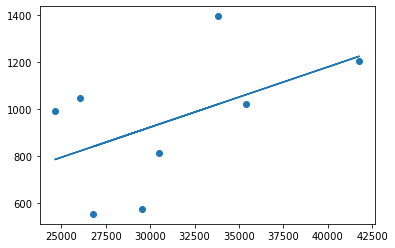

In [129]:
plt.figure("Linear Regression")
plt.scatter(x, y)
plt.plot(x, model.predict(x))
plt.show()

### Какое ожидается значение процента безработных инвалидов в 2020 году при сохранении текущей политики города Москвы?

Для этого найдем регрессию Полного количества безработных к году

In [138]:
data_2 = data_1_group.mean()[["UnemployedDisabled",
                     "UnemployedTotal"]]
data_2 = (data_2.reset_index())[["UnemployedTotal", "Year"]]
data_2

,UnemployedTotal,Year
0,33820.583333,2012
1,26025.916667,2013
2,24633.166667,2014
3,35415.916667,2015
4,41767.416667,2016
5,30494.416667,2017
6,26805.000000,2018
7,29519.500000,2019


In [139]:
model_1 = LinearRegression()
x1 = np.array(data_2['Year']).reshape(len(data_2.index), 1)
y1 = np.array(data_2['UnemployedTotal']).reshape(len(data_2.index), 1)
model_1.fit(x1, y1)

LinearRegression()

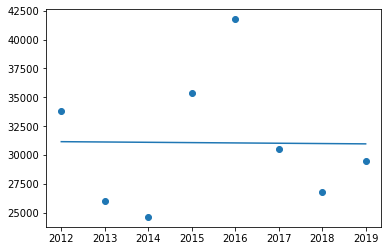

In [142]:
plt.figure("Linear Regression Year Total")
plt.scatter(x1, y1)
plt.plot(x1, model_1.predict(x1))
plt.show()

Найдем, какой предсказывается уровень Unemployed Total в 2020

In [145]:
total2020 = model_1.predict([[2020]])
total2020

array([[30938.26190476]])

Найдем, какой предсказывается уровень Unemployed Disabled при уровне Unemployed Total = total2020


In [147]:
disabled2020 = model.predict(total2020)
total2020

array([[30938.26190476]])

### значение процента безработных инвалидов в 2020 году
#### это у нас отношение средних

In [151]:
round((disabled2020 / total2020 * 100)[0][0], 2)

3.06

# нужно найти среднее отношений

In [153]:
data.dropna(axis=1, how='all', inplace=True)

In [154]:
data["Disabled"] = data["UnemployedDisabled"]/data["UnemployedTotal"]

In [155]:
data

,global_id,ID,Year,UnemployedMen,UnemployedWomen,UnemployedYoung,UnemployedDisabled,UnemployedTotal,Period,Disabled
0,39809862,1,2001,8896,25762,6696,824,34658,Декабрь,0.023775
1,64592413,3,2003,8679,24967,6226,1155,33646,Декабрь,0.034328
2,64592414,4,2004,9822,25239,7318,1411,35061,Декабрь,0.040244
3,64592415,5,2005,10844,23597,6890,1531,34441,Декабрь,0.044453
4,64592416,6,2006,11041,22928,6604,1671,33969,Декабрь,0.049192
...,...,...,...,...,...,...,...,...,...,...
96,918869066,101,2019,13123,16904,3103,575,30027,Февраль,0.019149
97,918869067,102,2019,13433,17164,3102,593,30597,Март,0.019381
98,926094627,103,2019,13803,17319,3060,593,31122,Апрель,0.019054
99,933200250,104,2019,12818,16221,2711,577,29039,Май,0.019870


In [159]:
data_3 = data.groupby("Year").filter(lambda x: len(x) >= 6).groupby("Year")
data_3.mean()

,global_id,ID,UnemployedMen,UnemployedWomen,UnemployedYoung,UnemployedDisabled,UnemployedTotal,Disabled
Year,,,,,,,,
2012,2.561585e+08,17.5,14505.333333,19315.250000,4909.250000,1393.916667,33820.583333,0.041221
2013,2.735736e+08,30.5,10719.416667,15306.500000,3388.666667,1047.416667,26025.916667,0.040313
2014,2.735736e+08,43.5,10271.666667,14361.500000,3239.833333,990.500000,24633.166667,0.040260
2015,2.735736e+08,56.5,15142.666667,20273.250000,5363.000000,1020.583333,35415.916667,0.029040
2016,2.763927e+08,69.5,18417.666667,23349.750000,5856.916667,1205.166667,41767.416667,0.028905
2017,5.707968e+08,81.5,13496.666667,16997.750000,3833.583333,812.000000,30494.416667,0.026561
2018,8.804362e+08,93.5,11669.750000,15135.250000,3001.000000,554.250000,26805.000000,0.020599
2019,9.248504e+08,102.5,12943.666667,16575.833333,2913.500000,574.500000,29519.500000,0.019473


In [161]:
data_4 = data_3.mean().reset_index()
model_3 = LinearRegression()
x3 = np.array(data_4["Year"]).reshape(len(data_4.index), 1)
y3 = np.array(data_4["Disabled"]).reshape(len(data_4.index), 1)
model_3.fit(x3, y3)

LinearRegression()

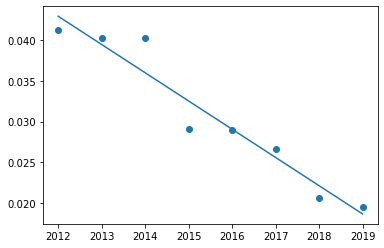

In [164]:
plt.figure("1")
plt.scatter(x3, y3)
plt.plot(x3, model_3.predict(x3))
plt.show()

In [168]:
round((model_3.predict([[2020]])*100)[0][0], 2)

1.52